In [29]:
import os
import glob
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(color_codes=True)

In [1]:
anno_dir = "/home/galaxy/project/alleleSpecific_analysis/results/ASE_analysis/readCount/by_ind/sig/anno/"
os.chdir(anno_dir)

In [10]:
# up or donw
result_dir = "../up_down/"

anno_list = glob.glob("individual_*.txt")
for ind in anno_list:
    up_file = os.path.join(result_dir, ind.replace(".txt", "_up.txt"))
    down_file = os.path.join(result_dir, ind.replace(".txt", "_down.txt"))
    df = pd.read_table(ind)
    effect_cols = [x for x in df.columns if "effect_" in x]
    df['median'] = df[effect_cols].median(axis = 1, skipna = True)
    df['type'] = np.where(df['median'] > 1, 'up', 'down')
    df_up, df_down = df[df['type'] == "up"], df[df['type'] == "down"]
    del df_up['median']
    del df_down['median']
    del df_up['type']
    del df_down['type']
    df_up.to_csv(up_file, sep="\t", index=False)
    df_down.to_csv(down_file, sep="\t", index=False)

In [14]:
# snp2gene
# for x in individual_*.bed;do bedtools intersect -a $x -b gencode.v19.annotation_Gene.bed -wb | sort -u > ${x%%bed}txt;done
work_dir = "/home/galaxy/project/alleleSpecific_analysis/results/ASE_analysis/readCount/by_ind/sig/snp2gene/"
os.chdir(work_dir)
txt_list = glob.glob("*.txt")
for x in txt_list:
    df = pd.read_table(x, header=None)
    type_list= df.iloc[:,9].tolist()
    type_dict = Counter(type_list)
    print(type_dict)

Counter({'protein_coding': 1477, 'antisense': 99, 'processed_transcript': 49, 'pseudogene': 44, 'lincRNA': 40, 'sense_overlapping': 4, 'polymorphic_pseudogene': 3, 'sense_intronic': 2, 'miRNA': 1})
Counter({'protein_coding': 1673, 'antisense': 142, 'pseudogene': 52, 'lincRNA': 46, 'processed_transcript': 41, 'IG_V_gene': 23, 'IG_C_gene': 12, 'sense_intronic': 6, 'snRNA': 3, 'misc_RNA': 2, 'TR_C_gene': 2, 'sense_overlapping': 2, 'IG_V_pseudogene': 1})
Counter({'protein_coding': 1124, 'antisense': 79, 'pseudogene': 48, 'lincRNA': 33, 'processed_transcript': 31, 'sense_intronic': 3, 'sense_overlapping': 2})
Counter({'protein_coding': 672, 'antisense': 43, 'pseudogene': 26, 'processed_transcript': 20, 'lincRNA': 18, 'miRNA': 1, '3prime_overlapping_ncrna': 1})
Counter({'protein_coding': 349, 'antisense': 19, 'processed_transcript': 18, 'pseudogene': 13, 'lincRNA': 4, 'sense_intronic': 1})
Counter({'protein_coding': 432, 'antisense': 38, 'processed_transcript': 16, 'pseudogene': 7, 'snRNA': 

In [1]:
### measure mapping biase

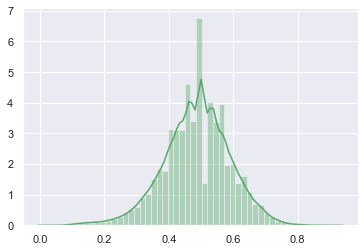

In [34]:
os.chdir("/home/galaxy/project/alleleSpecific_analysis/results/ASE_analysis/readCount/binomial_test/")
txt_list = glob.glob("*.txt")
# for x in txt_list:
#     if "_" not in x:
#         df = pd.read_table(x)
#         df['allelicRatio'] = df['altRPKM_ratio'] / (df['refRPKM_ratio']+df['altRPKM_ratio'])
#         # print(df.head())
#         print(x, np.median(df['allelicRatio']))
    # print(df.hist('allelicRatio'))
    # break
df = pd.read_table("heart_1_L6.binomials.txt")
# df['allelicRatio'] = df['altRPKM_ratio'] / (df['refRPKM_ratio']+df['altRPKM_ratio'])
# print(df['allelicRatio'].hist(grid=False))
x=df['allelicRatio'].tolist()
sns.distplot(x, kde=True,color = 'g')